In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:18pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:18px;}
</style>
"""))

<b><font size="6" color="red">ch13. 데이터 시각화</font></b>

# 1절. 시각화 개요
- 시각화 라이브러리 : matplotlib, seaborn, folium(지도시각화)
- matplotlib : 파이썬에서 가장 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
- seaborn : matplotlib 기반으로 다양한 색, 테마, 차트 기능과 groupby 기능을 추가한 라이브러리

# 2절. matplotlib
- https://pypi.org/project/matplotlib/
- https://matplotlib.org/stable/api/index.html : api reference

## 2.1 패키지 import 및 기본 설정

In [2]:
import matplotlib
matplotlib.__version__

'3.7.0'

%matplotlib inline : 주피터노트북이 실행되는 브라우저에서 시각화를 해라..<br>
%config InlineBackend.figure_format='retina' : 그래프 해상도를 높임. 'png'(기본값), 'jpge', 'svg', 'pdf'

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
# warning(경고) 안보이게
import warnings
# warnings.filterwarnings(action='ignore') # 경고 메세지 안 보이게
warnings.filterwarnings(action='default') # 경고 메세지 보이게

import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
import seaborn as sns

## 2.2 그래프 그리기
- matplotlib으로 그래프를 그리기 위한 단계
    1) 데이터 준비<br>
    2) 그래프 생성 <br>
    3) 그래프 함수로 그리기 <br>
    4) 그래프 커스터마이징 <br>
    5) 그래프 출력 및 저장<br>

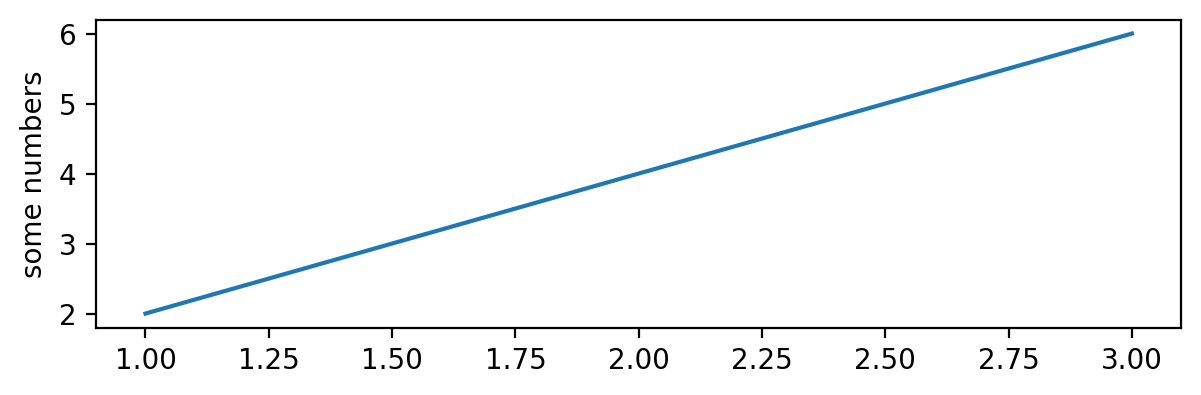

In [11]:
plt.figure(figsize=(7,2)) # 2) 그래프 객체 생성. 사이즈는 인치
plt.plot([1, 2, 3], [2, 4, 6]) # 3) 그래프 함수
plt.ylabel('some numbers')  # 4) 그래프 커스터마이징
plt.show() # 5)그래프 출력

## 2.3 그래프 영역 나누기
### 1) subplot()함수로 서브플롯 추가

In [13]:
import numpy as np
x = np.arange(0, 10, 0.01)
x.shape

(1000,)

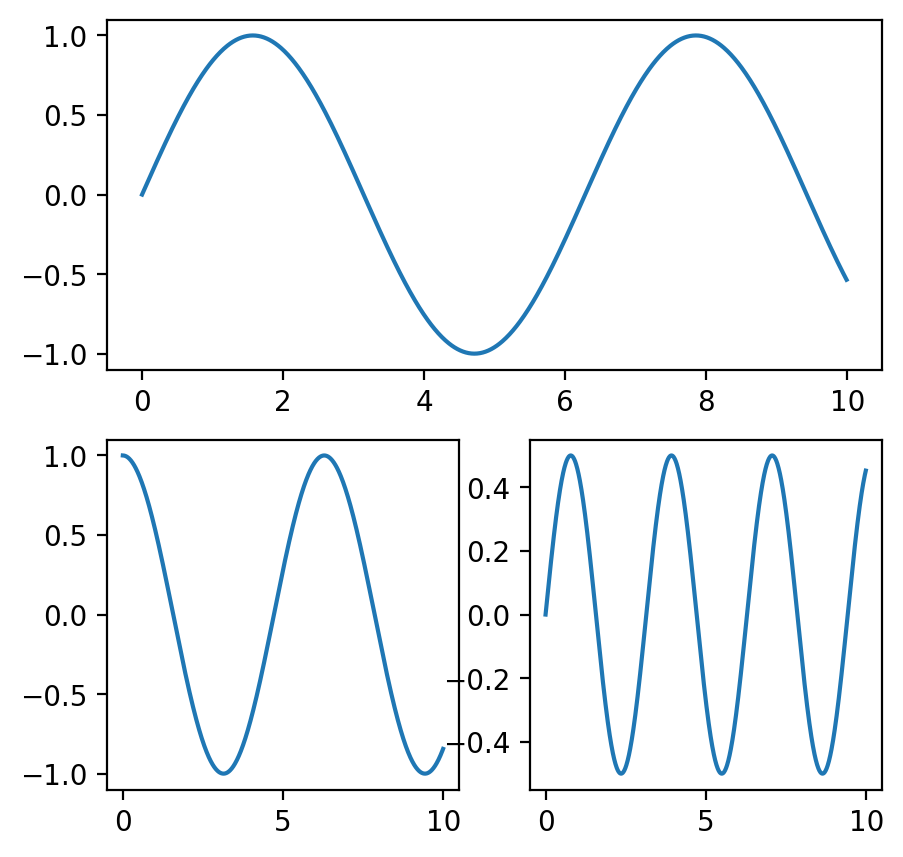

In [19]:
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1) # 2행 1열의 subplot에서 1번째 subplot에 다음과 같이 그래프 그릴거야
plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3) # 2행2열의 subplot에서 3번째 subplot에 다음과 같이 그래프 그릴거야
#plt.subplot(223)
plt.plot(x, np.cos(x))
plt.subplot(2, 2, 4) # 2행2열의 subplot에서 4번째 subplot에 다음과 같이 그래프 그릴거야
plt.plot(x, np.sin(x)*np.cos(x))
plt.show()

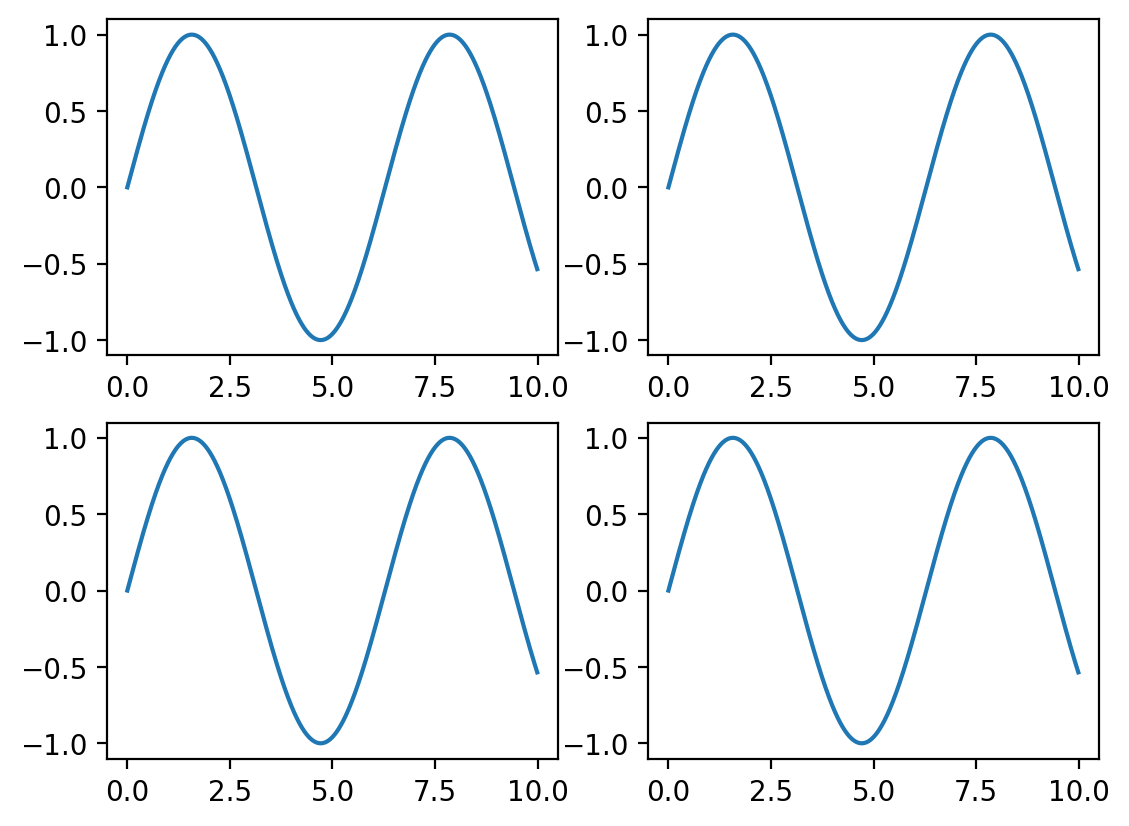

In [22]:
plt.subplot(2, 2, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 2); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 4); plt.plot(x, np.sin(x))
plt.show()

### 2) subplots()함수로 서브플롯 추가
- plot함수에서 색상이나 스타일을 조정 : https://wikidocs.net/92085

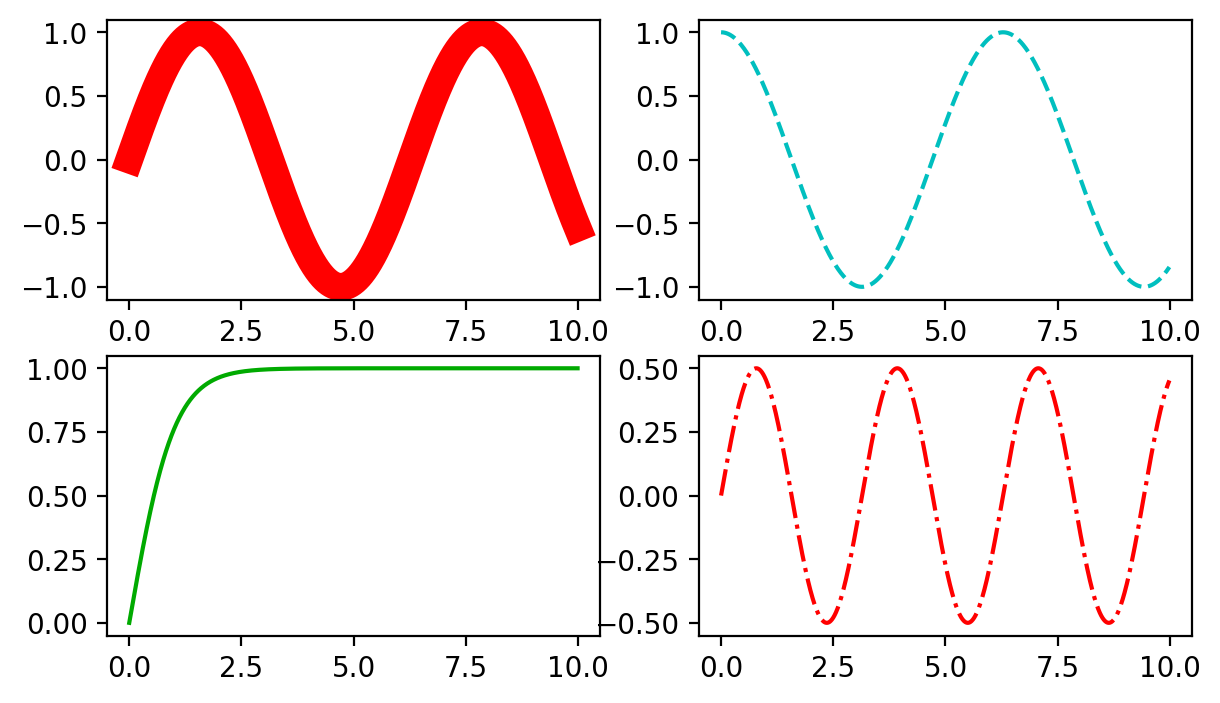

In [42]:
# 2행2열 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,4))
axes[0,0].plot(x, np.sin(x), 'r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c--') # color='c', linestyle='--'(대시라인) :(점선)
axes[1,0].plot(x, np.tanh(x), color='#00AA00')
#axes[1,0].plot([0,1,2,3],[-1, -0.5, 0, 0.5], 'ko:') # k:black, marker='o', linestyle=':'
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'r-.')

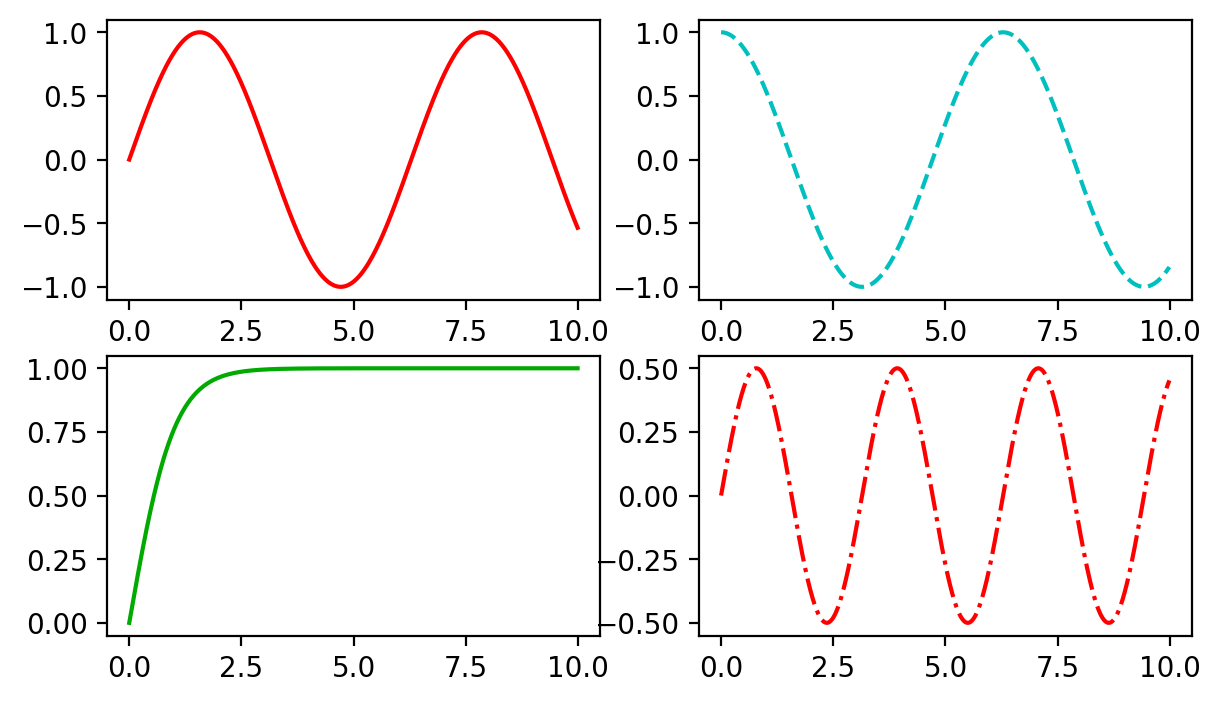

In [52]:
# 2행2열 서브플롯(for문 사용)
func_list = [np.sin, np.cos, np.tanh, lambda x:np.sin(x)*np.cos(x)]
fmt_list  = ['r','c--','#00AA00', 'r-.']
fig, axes = plt.subplots(2, 2, figsize=(7,4))
# list(enumerate(axes.flat))
for idx, ax in enumerate(axes.flat):
    ax.plot(x, func_list[idx](x), fmt_list[idx])

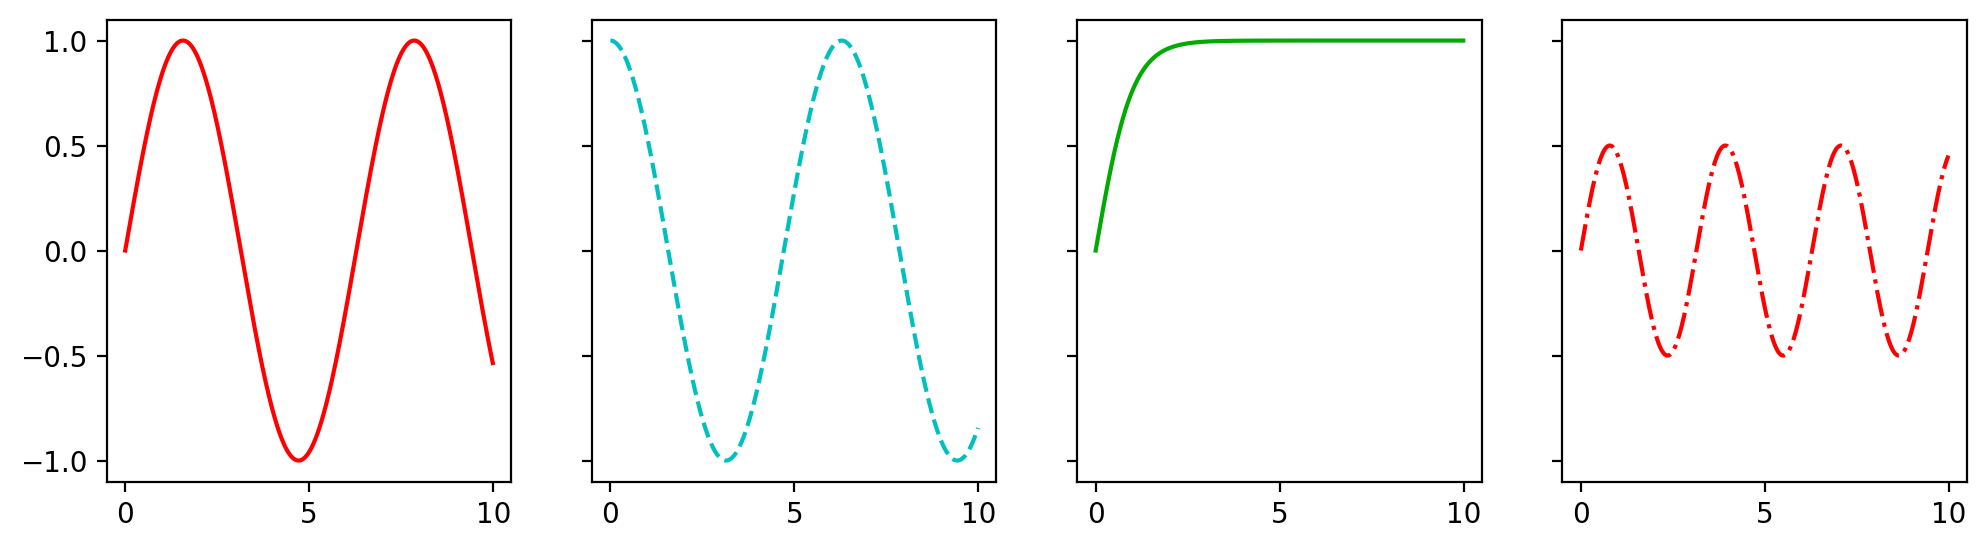

In [56]:
# 1행 4열 서브플롯
fig, axes = plt.subplots(ncols=4, figsize=(12,3), sharey=True) # y축 공유
for i, ax in enumerate(axes):
    ax.plot(x, func_list[i](x), fmt_list[i])

## 2.4 다양한 그래프 그리기
### 1) pyplot 함수들 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
### 2) matplotlib.pyplot.plot() : 선그래프

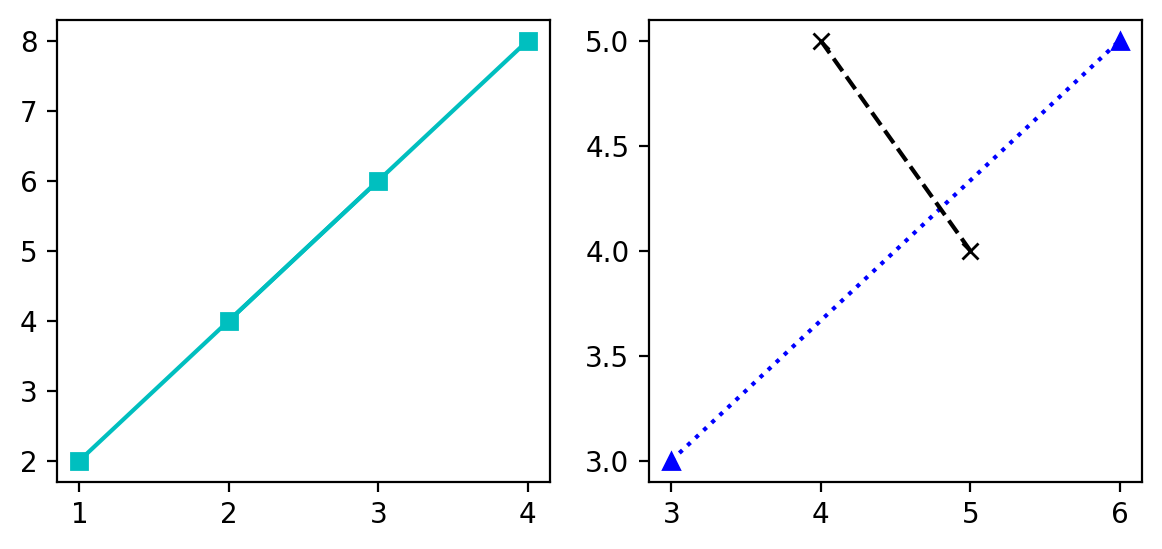

In [61]:
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
axes[0].plot([[1, 2],[3,4]],
             [[2, 4],[6,8]], 'cs-')#color='c':cyan, marker='s':사각마커, linestyle='-'실선
axes[1].plot([3,6],[3,5], 'b^:') # b(blue), ^(마커) :(점선)
axes[1].plot([4,5],[5,4], 'kx--') #k(black), x(마커) --(대시드점선)

### 3) pandas.DataFrame.plot()
- plt.plot(x, y, fmt) <br>
- df.plot(x=None, y=None, kind='line', figsize=None, title=None, grid=None, xlim, ylim,...)<br>
    * kind : line(기본값), scatter(점도표), bar, barh, box, density, pie....<br>
    * figsize : tuple(인치단위)<br>
    * xlim, ylim : list/tuple

In [8]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
89,5.5,2.5,4.0,1.3,versicolor


https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용

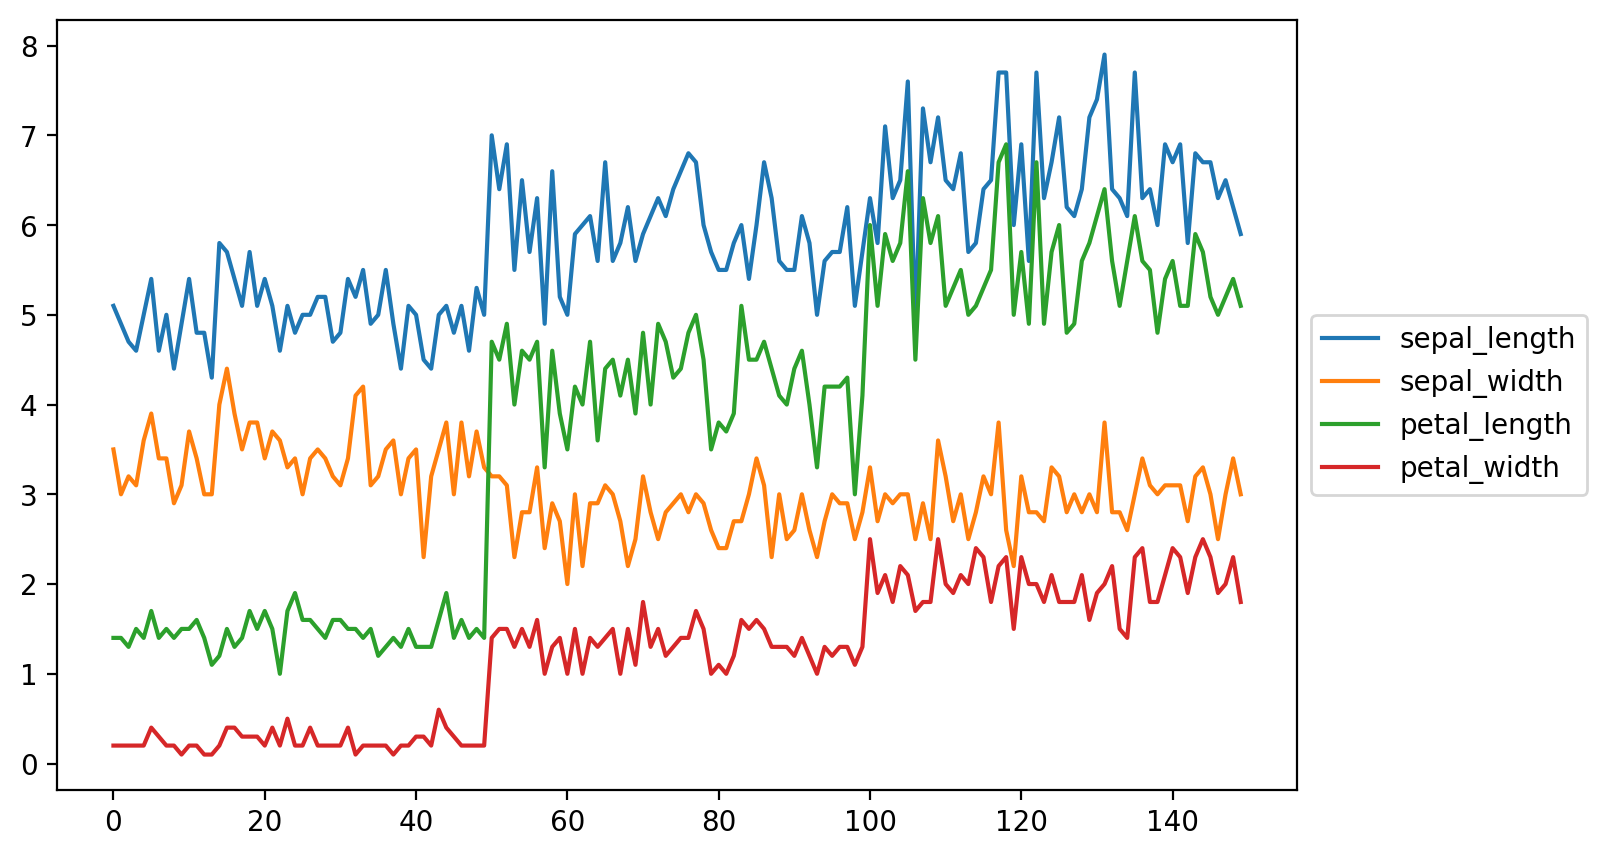

In [108]:
g = iris.plot(kind='line', figsize=(8,5))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

https://ko.wikipedia.org/wiki/상자_수염_그림

https://matplotlib.org/stable/tutorials/colors/colormaps.html (colormap)

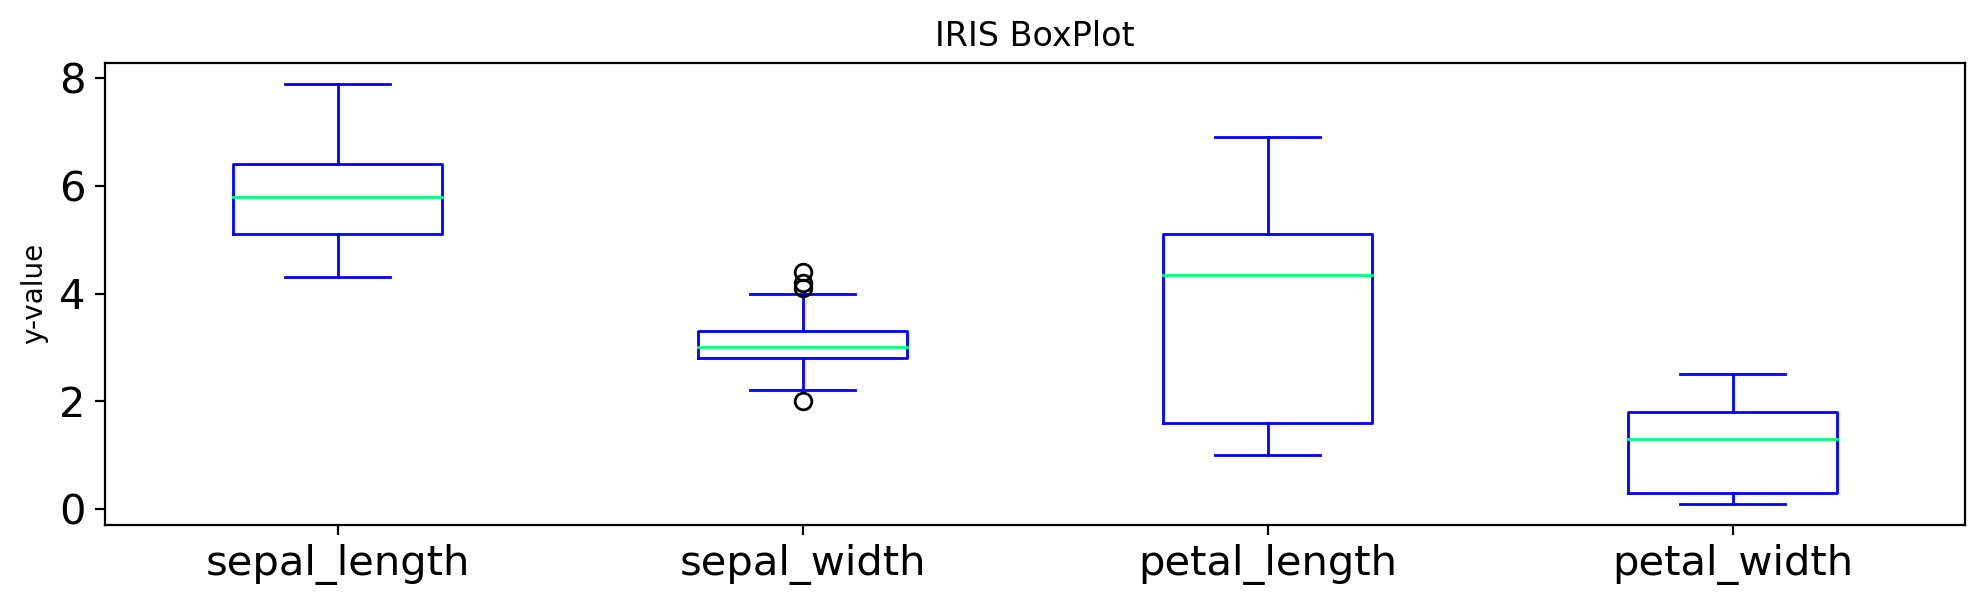

In [85]:
iris.plot(kind='box', figsize=(12,3), title='IRIS BoxPlot',
         ylabel='y-value',  fontsize=15, colormap='winter')
plt.show()

In [81]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


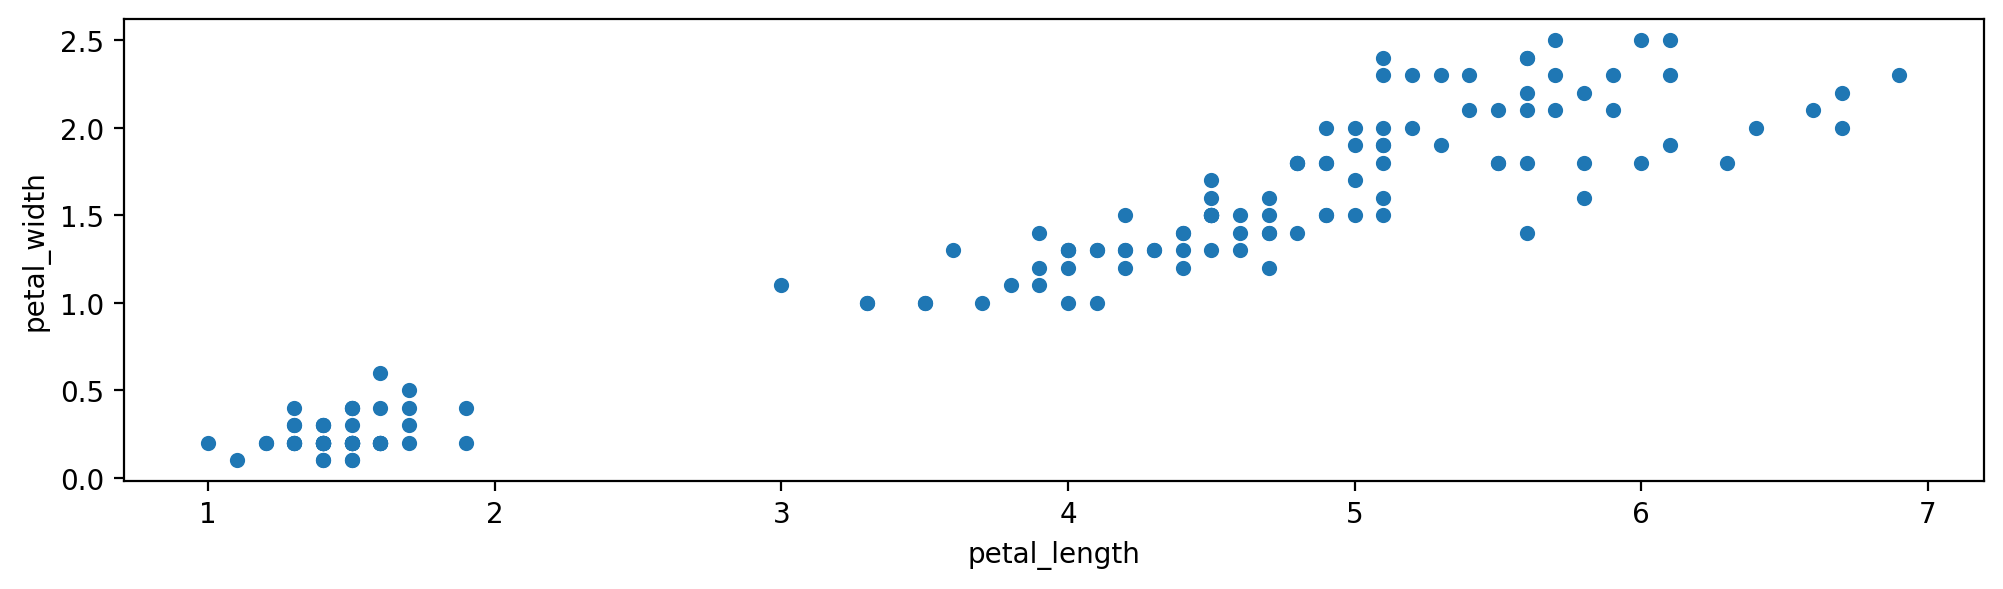

In [84]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', figsize=(12,3))
plt.show()

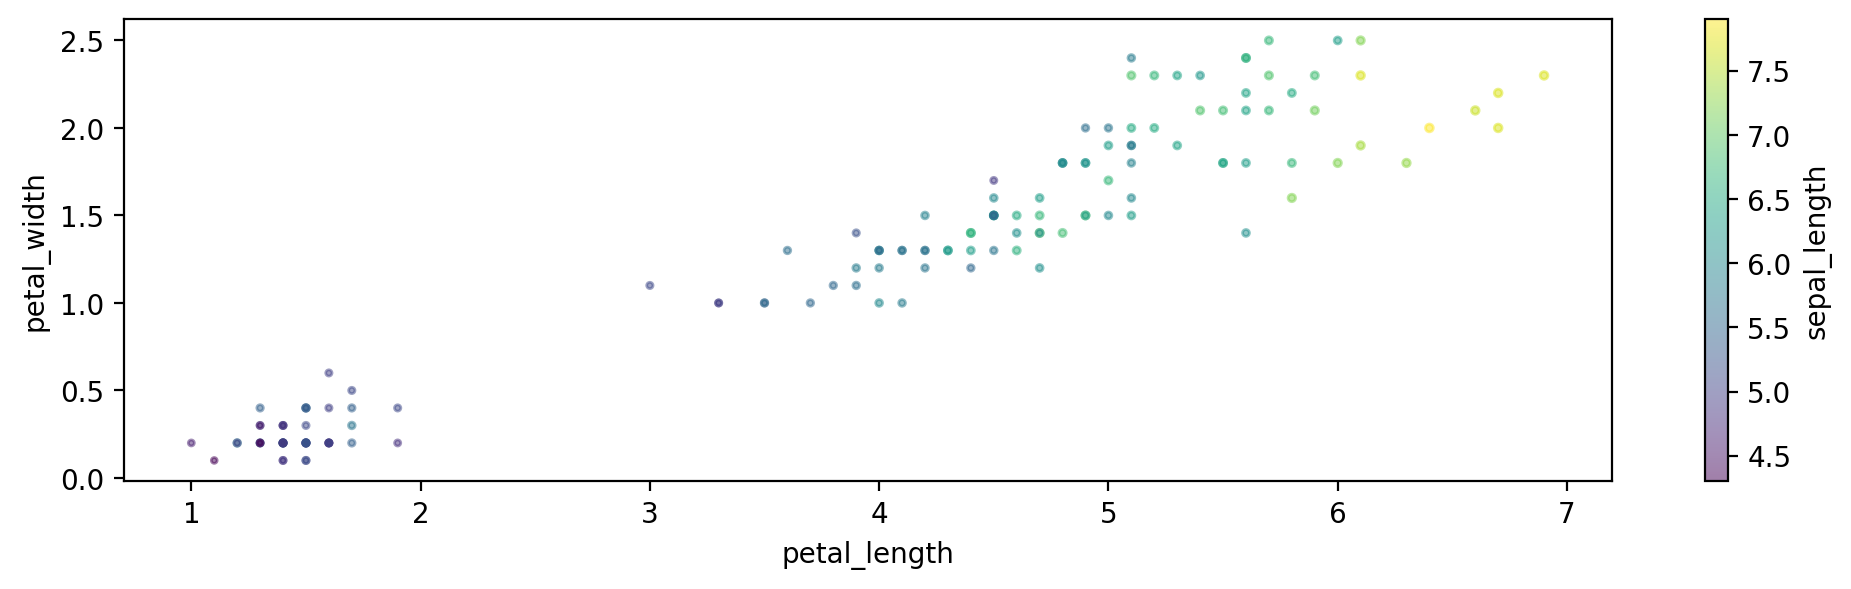

In [93]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', figsize=(12,3),
         s='sepal_length', # s:점의 크기, c:색상
         c='sepal_length',
         alpha=.5) # 투명도
plt.show()

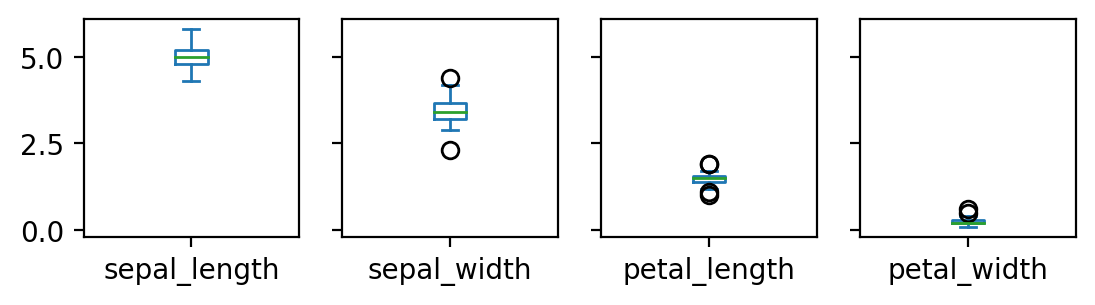

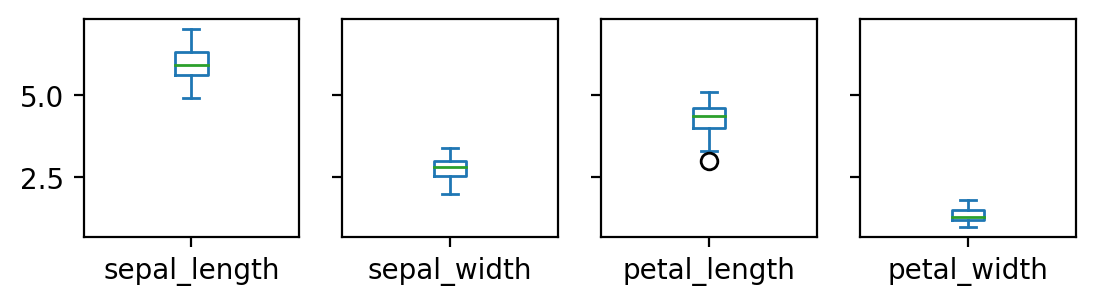

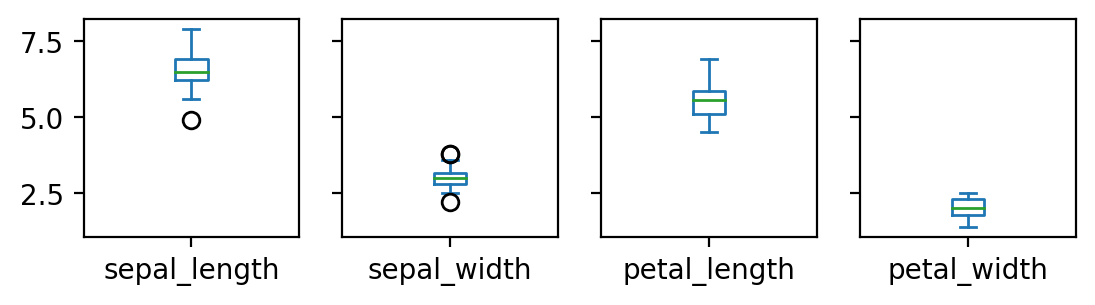

In [99]:
# 종별 boxplot
iris.groupby('species').plot(kind='box',
                            subplots=True,
                            layout=(3, 4),
                            sharey=True) # y축 공유
plt.show()

### 4) plt.scatter() : 산점도

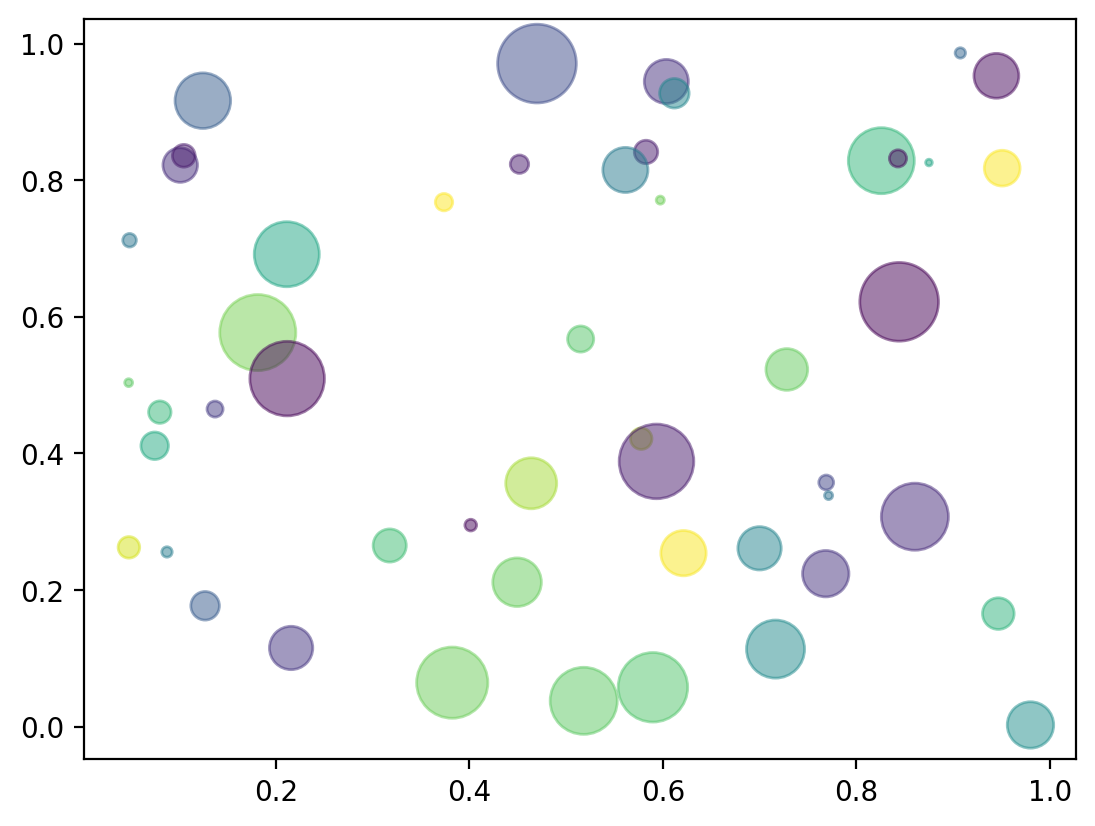

In [105]:
x = np.random.rand(50) # 균등분포의 1차원 난수 50개 발생(배열)
y = np.random.rand(50)
colors = np.random.rand(50)
area = (np.random.rand(50)*30)**2
plt.scatter(x, y, s=area, # 점의 크기
            c = colors,
            alpha=.5 # 투명도 (투명0~1불투명)
           )
plt.show()

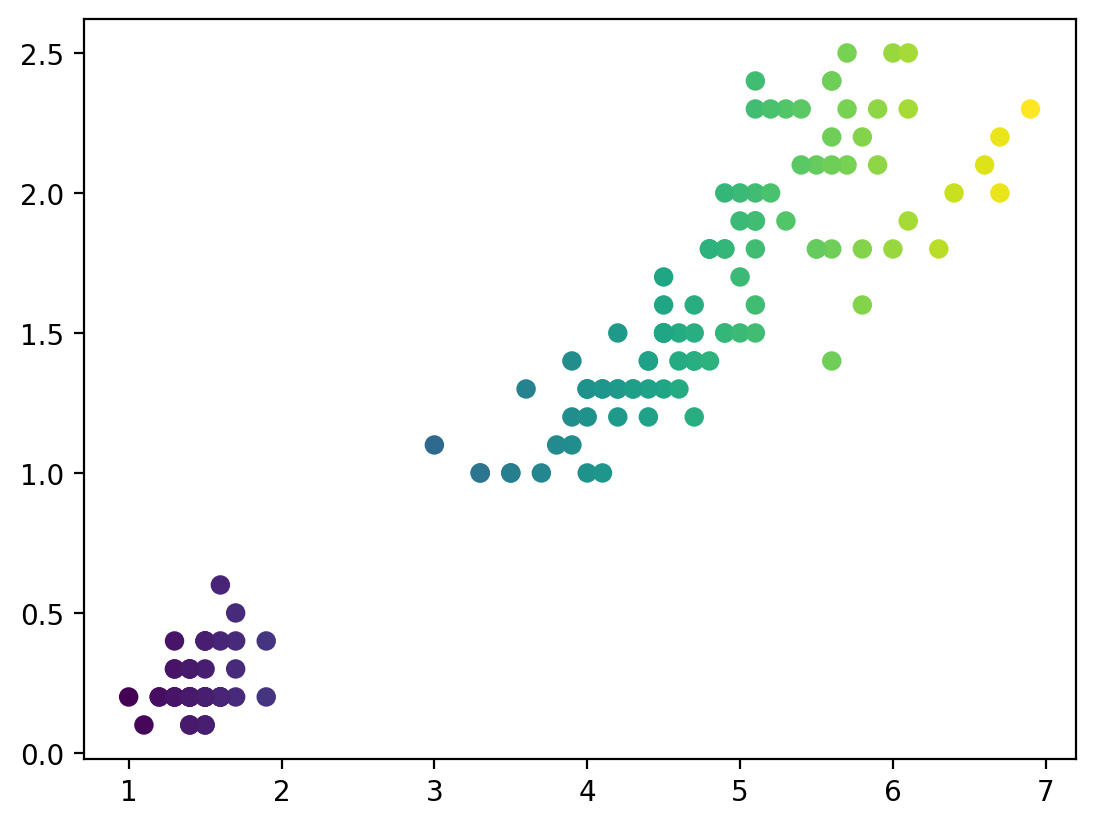

In [109]:
plt.scatter(x=iris.petal_length, y=iris.petal_width,
           c=iris.petal_length*20)

## 2.5 그외 그래프 그리기
### 1) fill(), fill_between(), scatter()
### 2) bar(), barh(), axvline(), axhline()
### 3) hist(히스토그램), boxplot(분포를 몰라), violinplot()

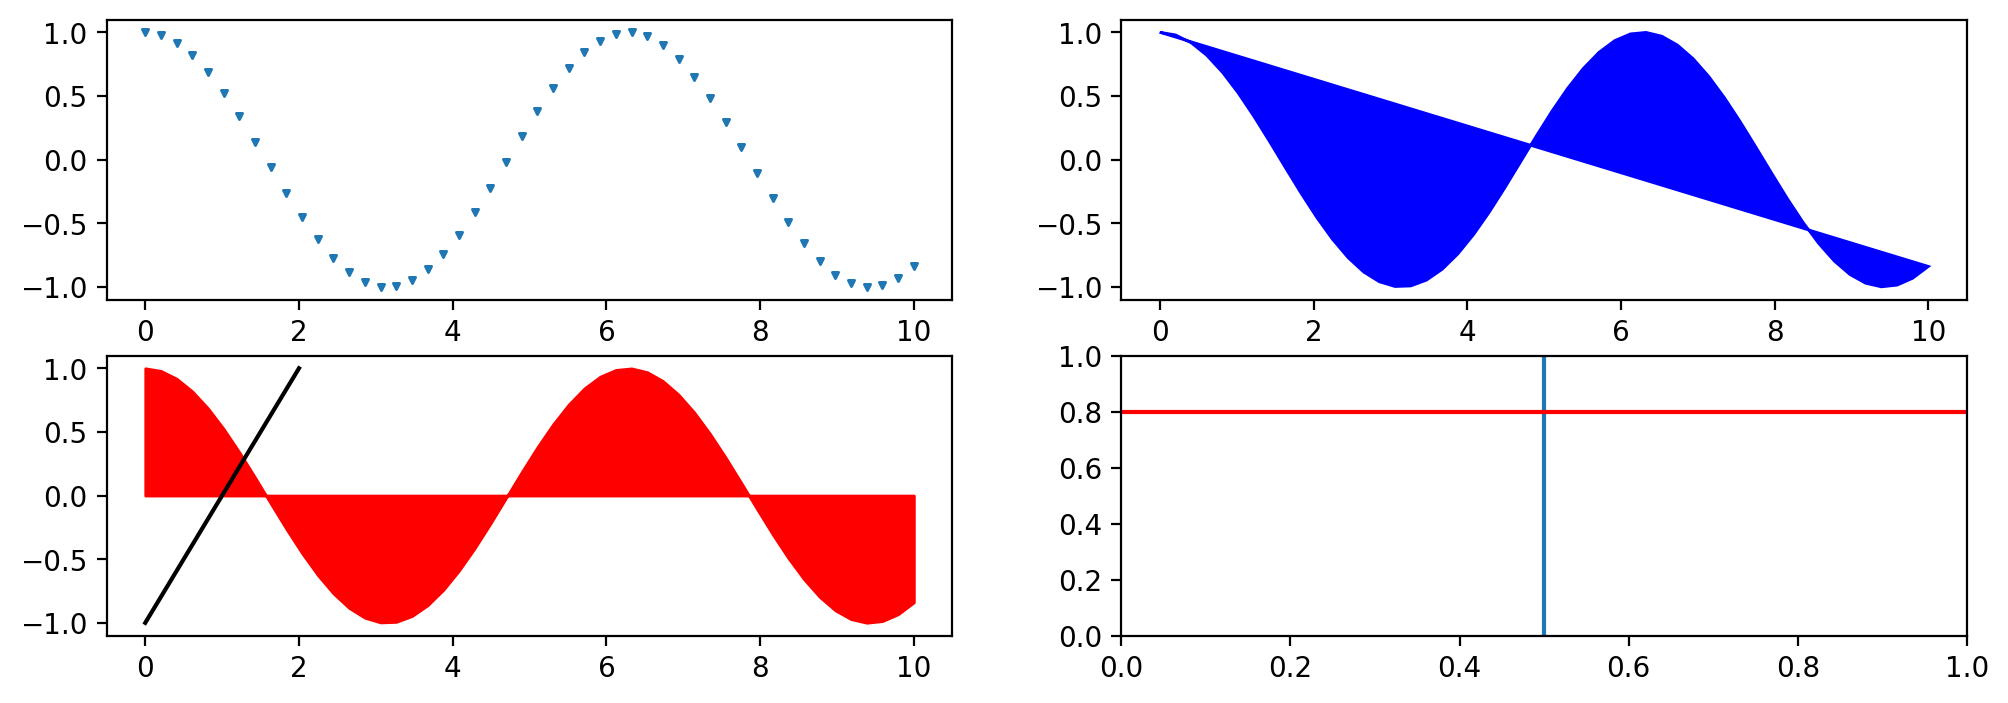

In [129]:
x = np.linspace(0, 10) # 0부터 10까지 일정한 간격으로 50(기본값)개 수 추출
y = np.cos(x)
fig, axes = plt.subplots(2, 2, figsize=(12,4))
axes[0,0].scatter(x, y, s=5, marker='v')
axes[0,1].fill(x, y, c='b')
axes[1,0].fill_between(x, y, color='r')
axes[1,0].plot([0,2],[-1, 1], 'k')
axes[1,1].axvline(0.5)
axes[1,1].axhline(0.8, c='r', linestyle='--')

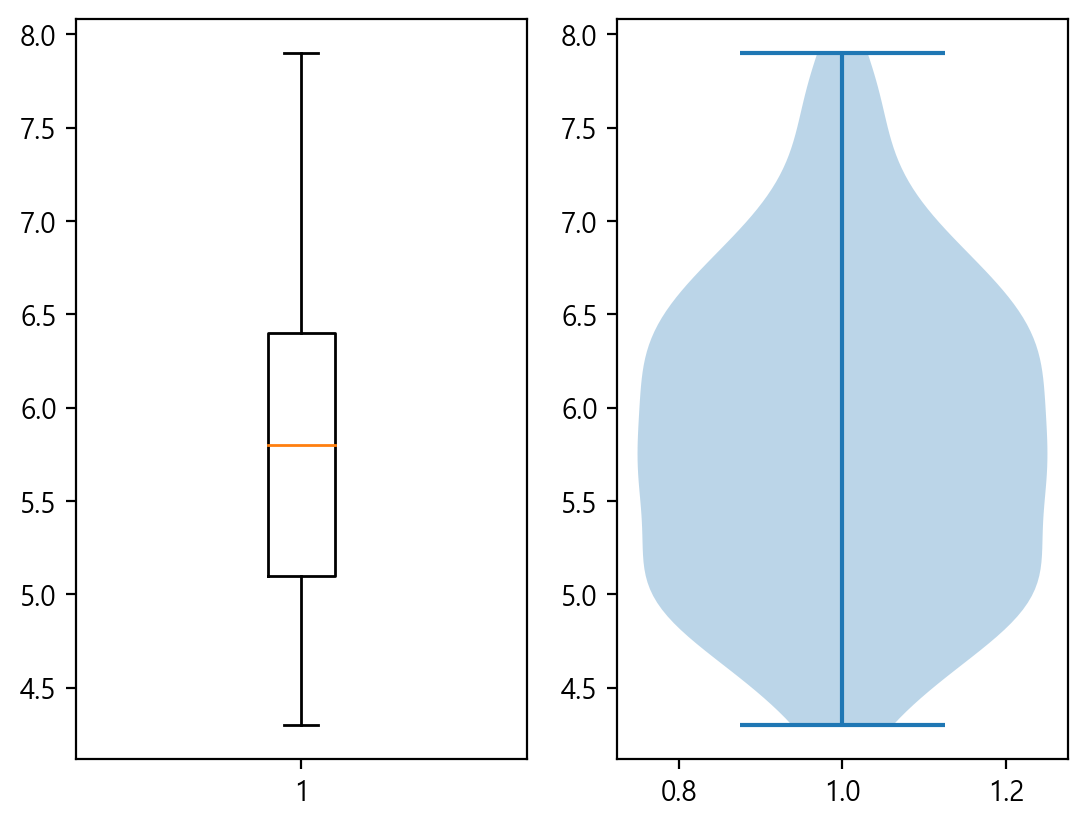

In [10]:
# boxplot vs. violinplot
fig, axes = plt.subplots(ncols=2)
axes[0].boxplot(iris.sepal_length)
#axes[0].violinplot(iris.sepal_length)
axes[1].violinplot(iris.sepal_length)
plt.show()

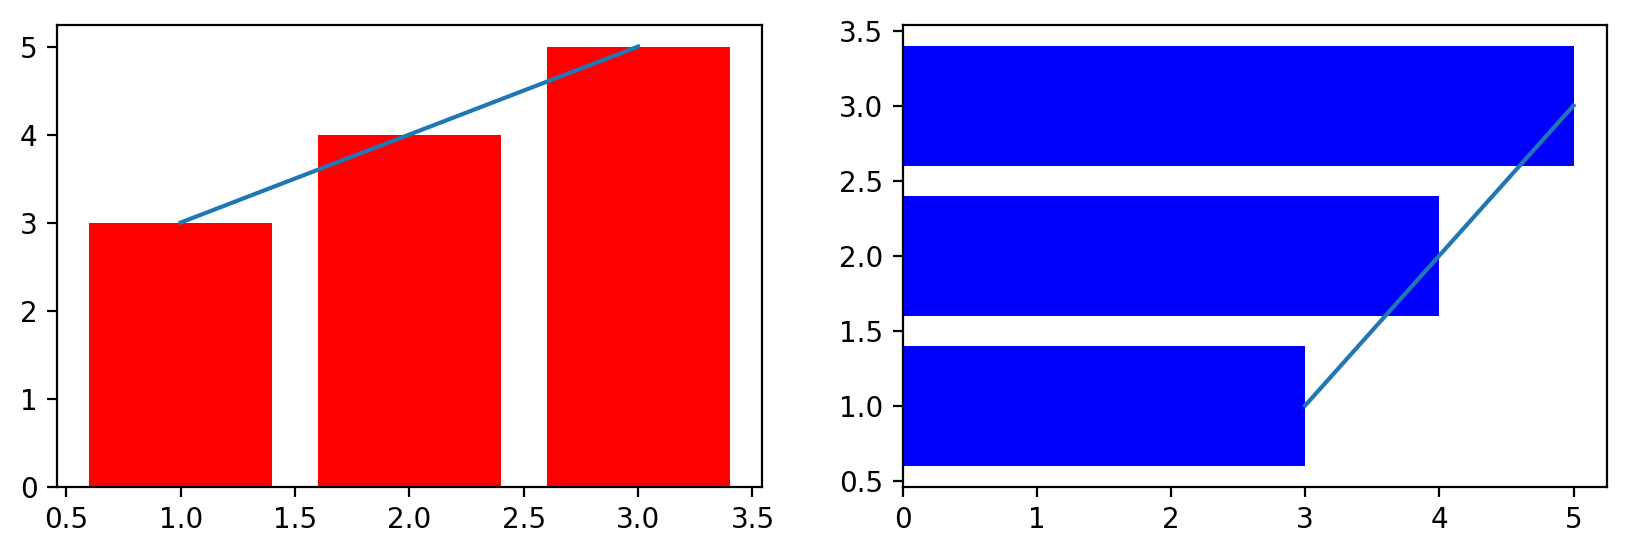

In [9]:
# bar, barh
x = [1,2,3]
y = [3,4,5]
fig, axes = plt.subplots(ncols=2, figsize=(10,3))
axes[0].bar(x, y, color='r')
axes[0].plot(x, y)
axes[1].barh(x, y, color='b')
axes[1].plot(y,x)

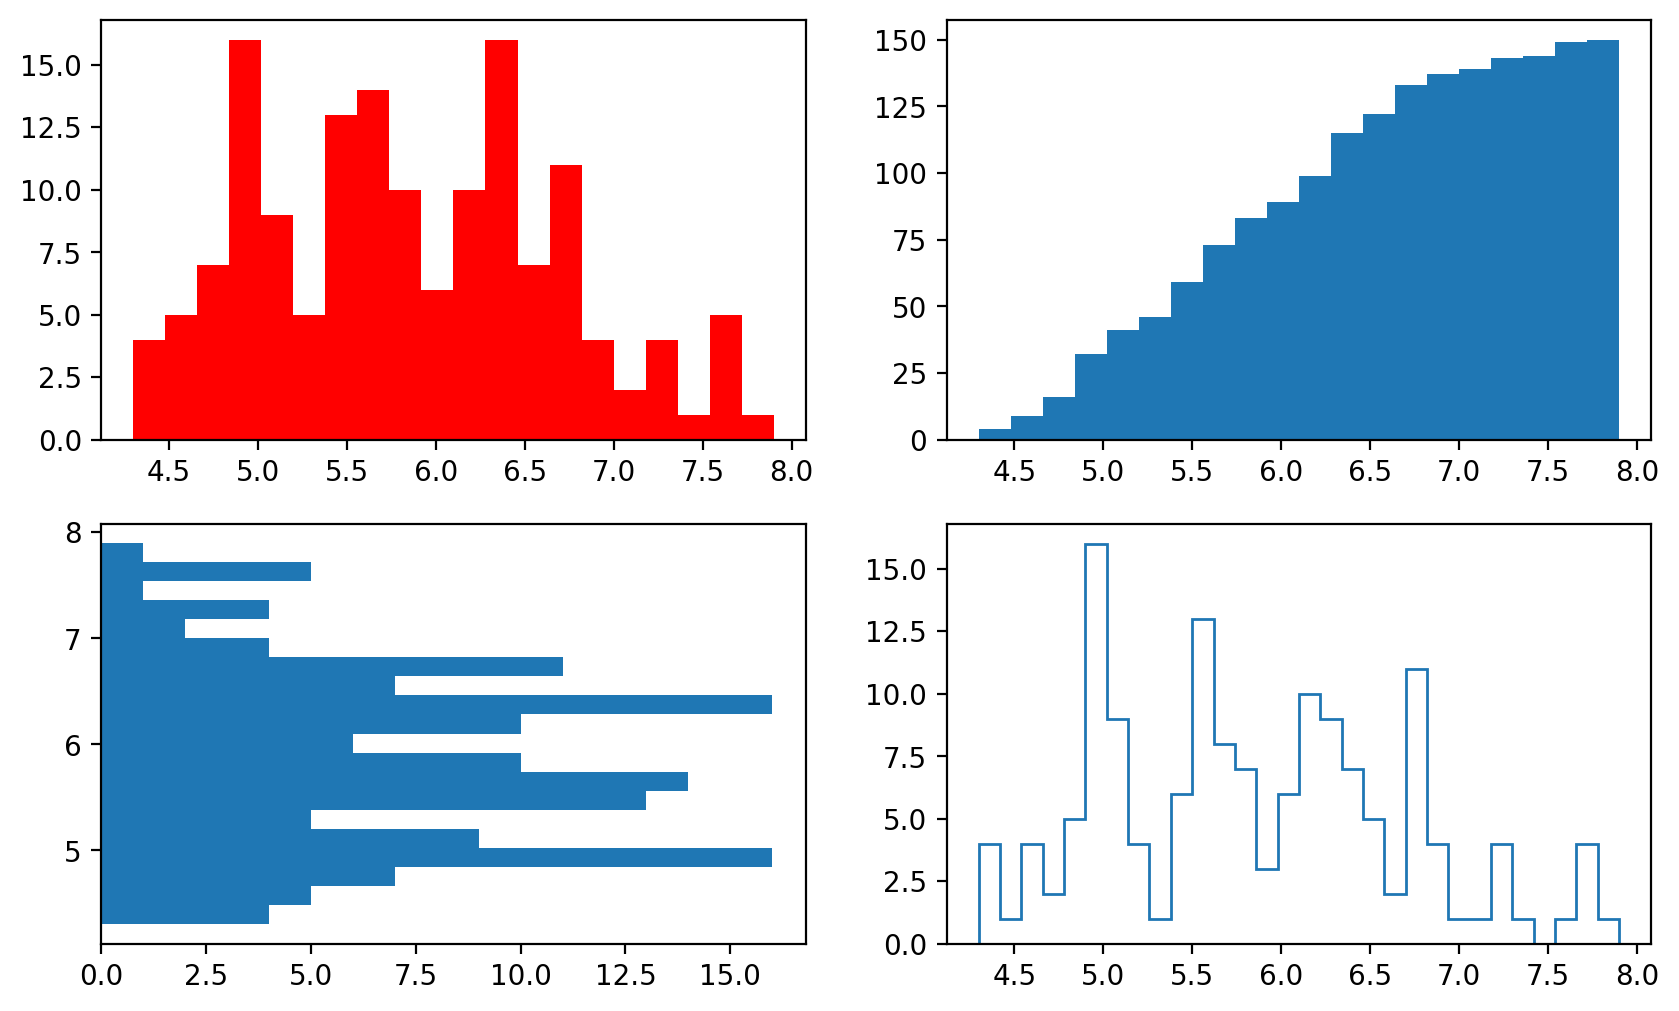

In [19]:
# hist - 히스토그램(도수분포표를 그래프화)
import seaborn as sns
iris = sns.load_dataset('iris')
fig, axes = plt.subplots(2, 2, figsize=(10,6))
axes[0,0].hist(iris.sepal_length, bins=20, color='r') # 히스토그램
axes[0,1].hist(iris.sepal_length, bins=20, cumulative=True) # 누적히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal') # 수평 히스토그램
axes[1,1].hist(iris.sepal_length, bins=30, histtype='step') 
plt.show()

## 2.6 그래프 커스터마이징
### 1) linestyle, linewidth, color, marker...
### 2) text(), annotate
https://matplotlib.org/api/axes_api.html#text-and-annotations

In [39]:
# 한글 기본 폰트 설정 방법
# plt.rcParams['font.family'] = '~'를 바꿈
plt.rc('font', family='Malgun Gothic') # 윈도우즈
# plt.rc('font', family='AppleGothic') Mac
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

In [ ]:
import matplotlib
print(matplotlib.get_cachedir())

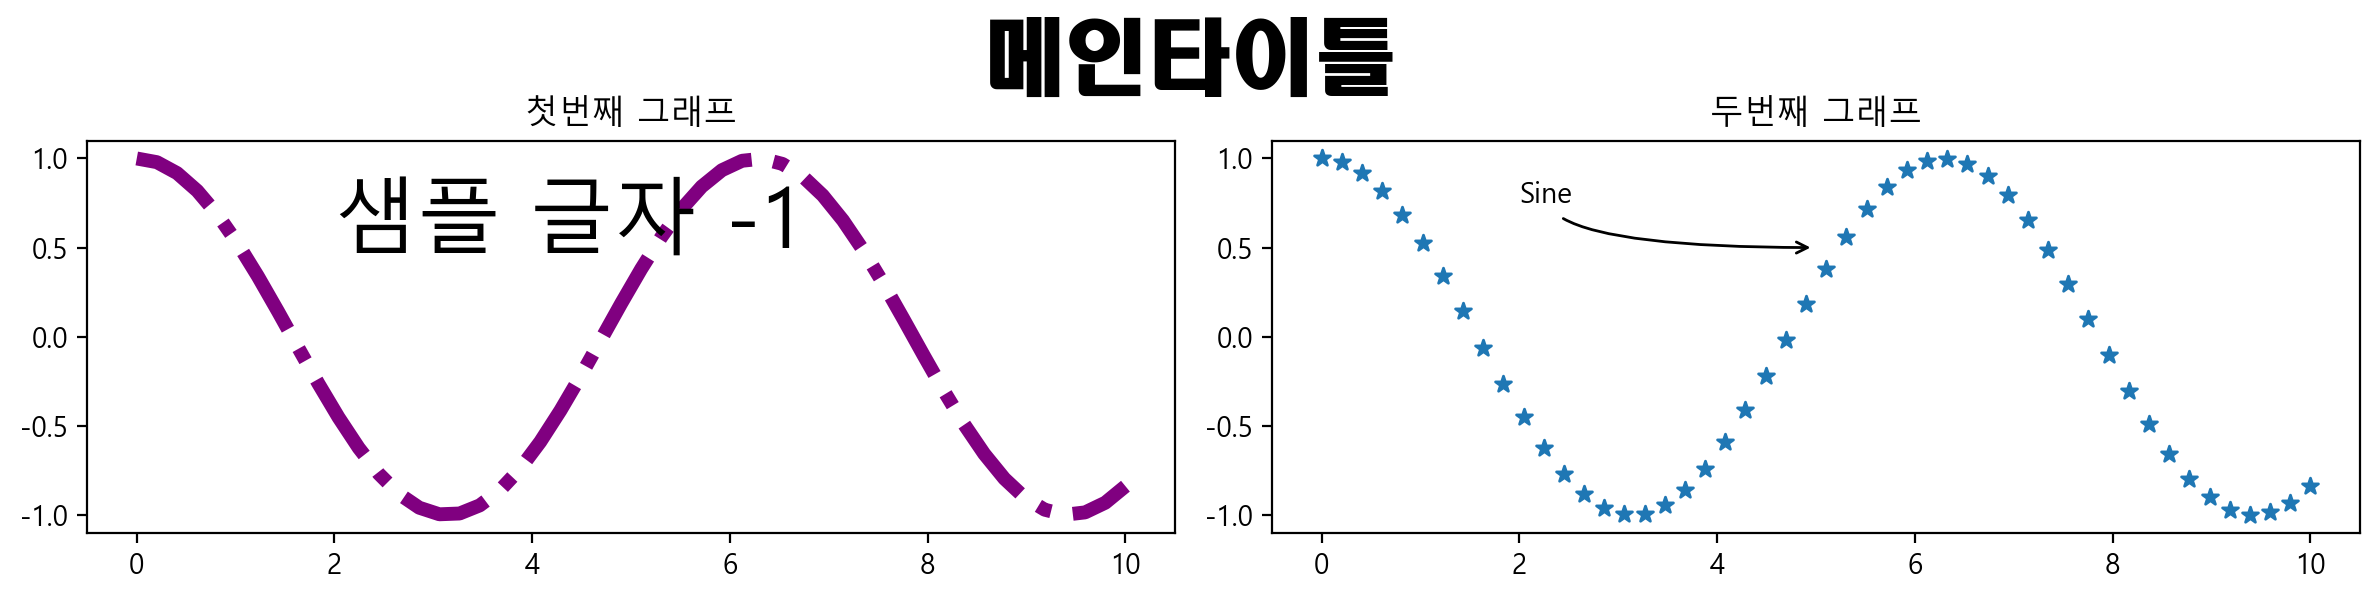

In [89]:
# 한글 특정 폰트 설정 방법
from matplotlib.font_manager import FontProperties
font_path = 'C:/Windows/Fonts/HMKMRHD.TTF'
font_prop = FontProperties(fname=font_path, size=30)

import numpy as np
x = np.linspace(0, 10)
y = np.cos(x)
fig, axes = plt.subplots(1, 2, figsize=(12,3))
axes[0].plot(x, y, linewidth=5, linestyle='-.', color='purple')
axes[0].text(2, 0.5, '샘플 글자 -1', fontsize=30)
axes[0].set_title('첫번째 그래프')

axes[1].scatter(x, y, marker='*')
axes[1].annotate('Sine', xytext=(2, 0.75), # 글자가 있을 좌표 위치
             xy=(5, 0.5), # 화살표가 가리킬 좌표 위치
             arrowprops= dict(arrowstyle='->',
                             connectionstyle='angle3') # angle, angle3, arc, ...
            )
axes[1].set_title('두번째 그래프')
# 레이아웃이 자동 조정
# rect = [left(0), bottom(0), right(1), top(1) ] 각 경계의 상대적 비율
plt.tight_layout(rect = [0, 0, 1, 0.9])

plt.suptitle('메인타이틀', fontproperties=font_prop)
plt.show()

### 3) 수학기호
: https://matplotlib.org/users/mathtext.html

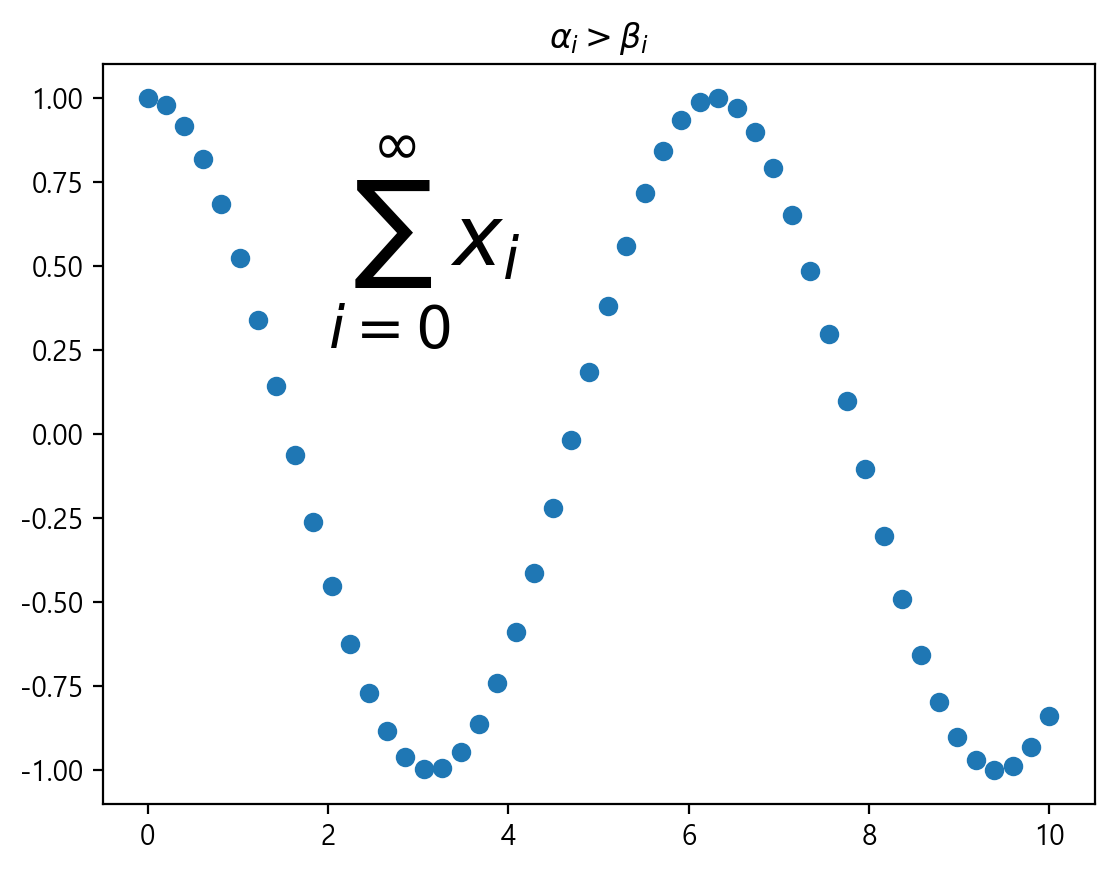

In [64]:
plt.scatter(x, y, marker='o')
plt.title(r'$\alpha_i > \beta_i$')
plt.text(2, 0.5, r'$\sum_{i=0}^\infty x_i$', fontsize=30)
plt.show()

### 4) 축과 눈금

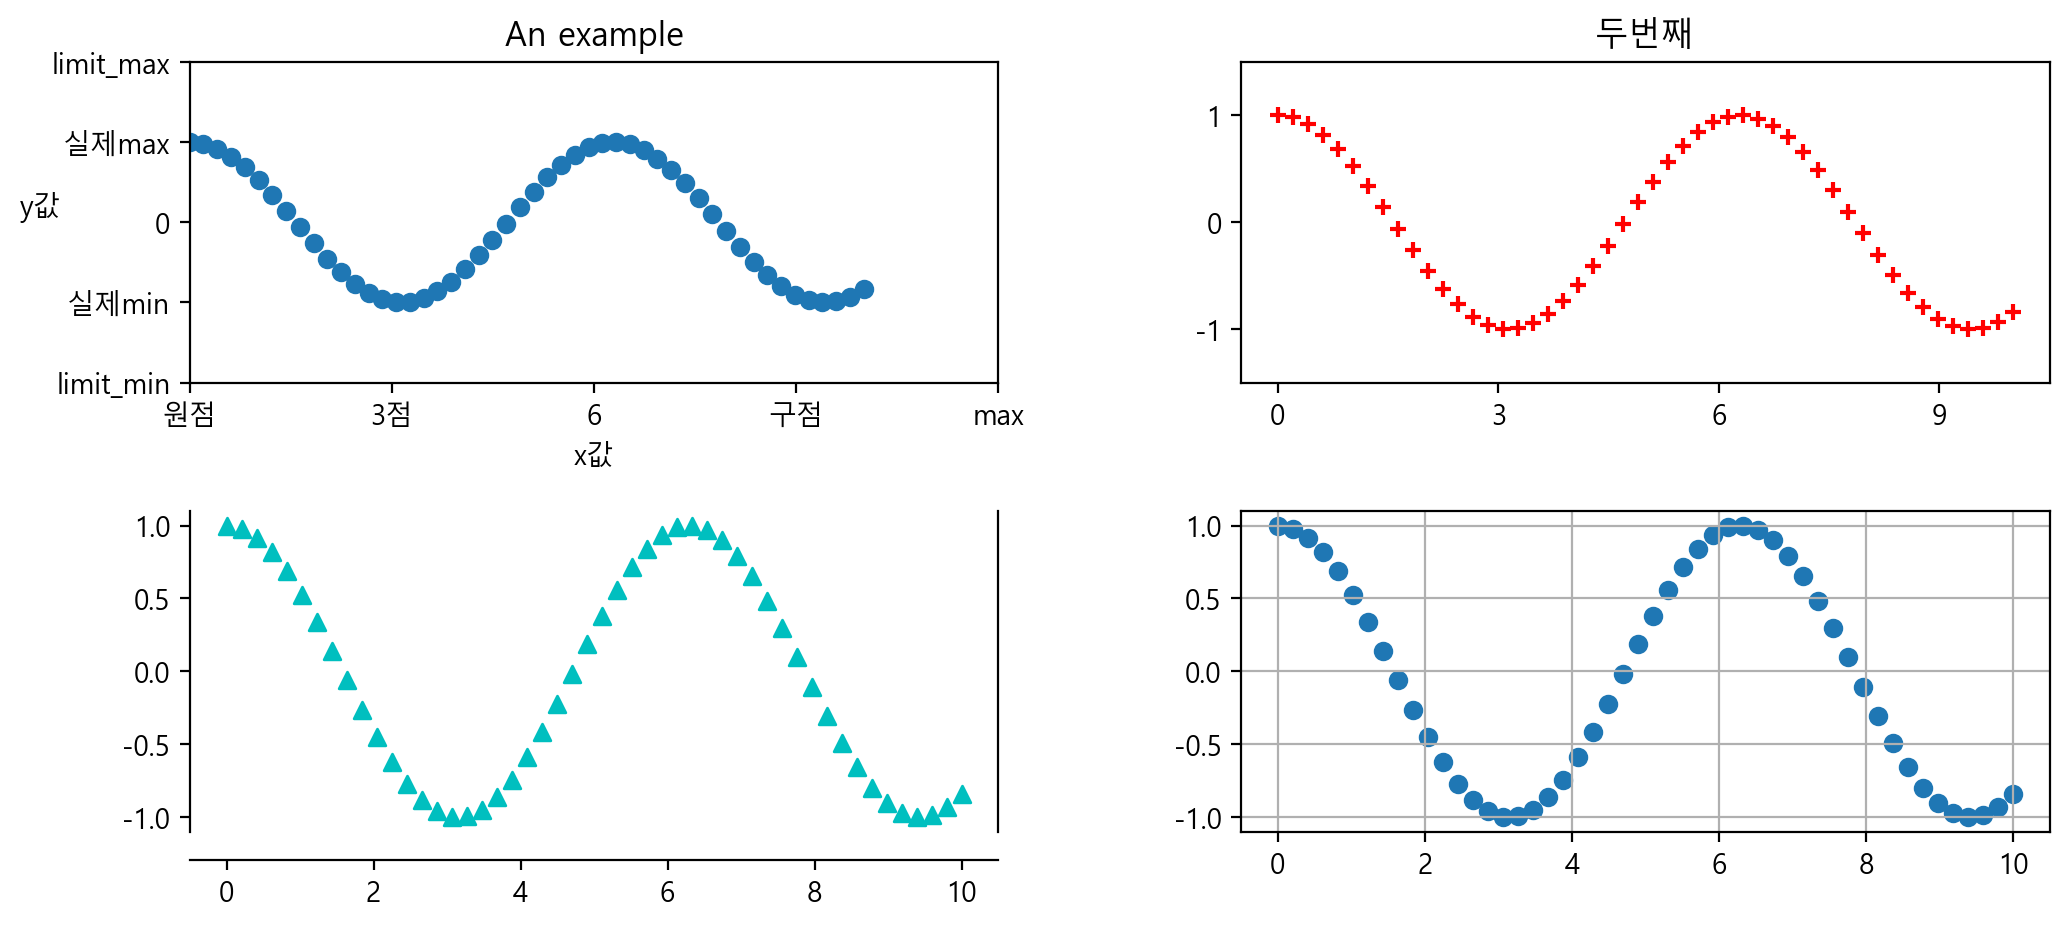

In [90]:
x = np.linspace(0, 10) # 0부터 10까지 일정한 간격의 50개 값을 배열
y = np.cos(x)
fig, axes = plt.subplots(2, 2, figsize=(12,5))
# subplot들끼리의 여백 조정
plt.subplots_adjust(hspace=0.4, wspace=0.3) # hspace위아래여백, wspace좌우여백
axes[0,0].scatter(x, y)
axes[0,0].set(title='An example', ylabel='y값', xlabel='x값',
             xlim=[0, 12], # x축 눈금의 범위
             ylim=[-2,2],  # y축 눈금의 범위
             xticks=[0,3,6,9,12], # x축 눈금
             xticklabels = ['원점','3점', 6, '구점','max'], # x축 눈금 라벨
             yticks=[-2,-1, 0, 1, 2],
             yticklabels = ['limit_min', '실제min',0,'실제max','limit_max']
             )
axes[0,0].set_ylabel('y값', rotation=0)
axes[0,1].scatter(x, y, color='r', marker='+')
axes[0,1].set_title('두번째')
axes[0,1].set_xticks(range(0,11,3))
axes[0,1].set_ylim(-1.5,1.5)
axes[1,0].scatter(x, y, color='c', marker='^')
axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['bottom'].set_position( ('outward', 10) )
axes[1,1].scatter(x, y)
axes[1,1].grid(True)
plt.show()

### 5) 축공유 ★

In [92]:
x = np.arange(0, 10)
y1 = 0.5*x**2
y2 = -y1

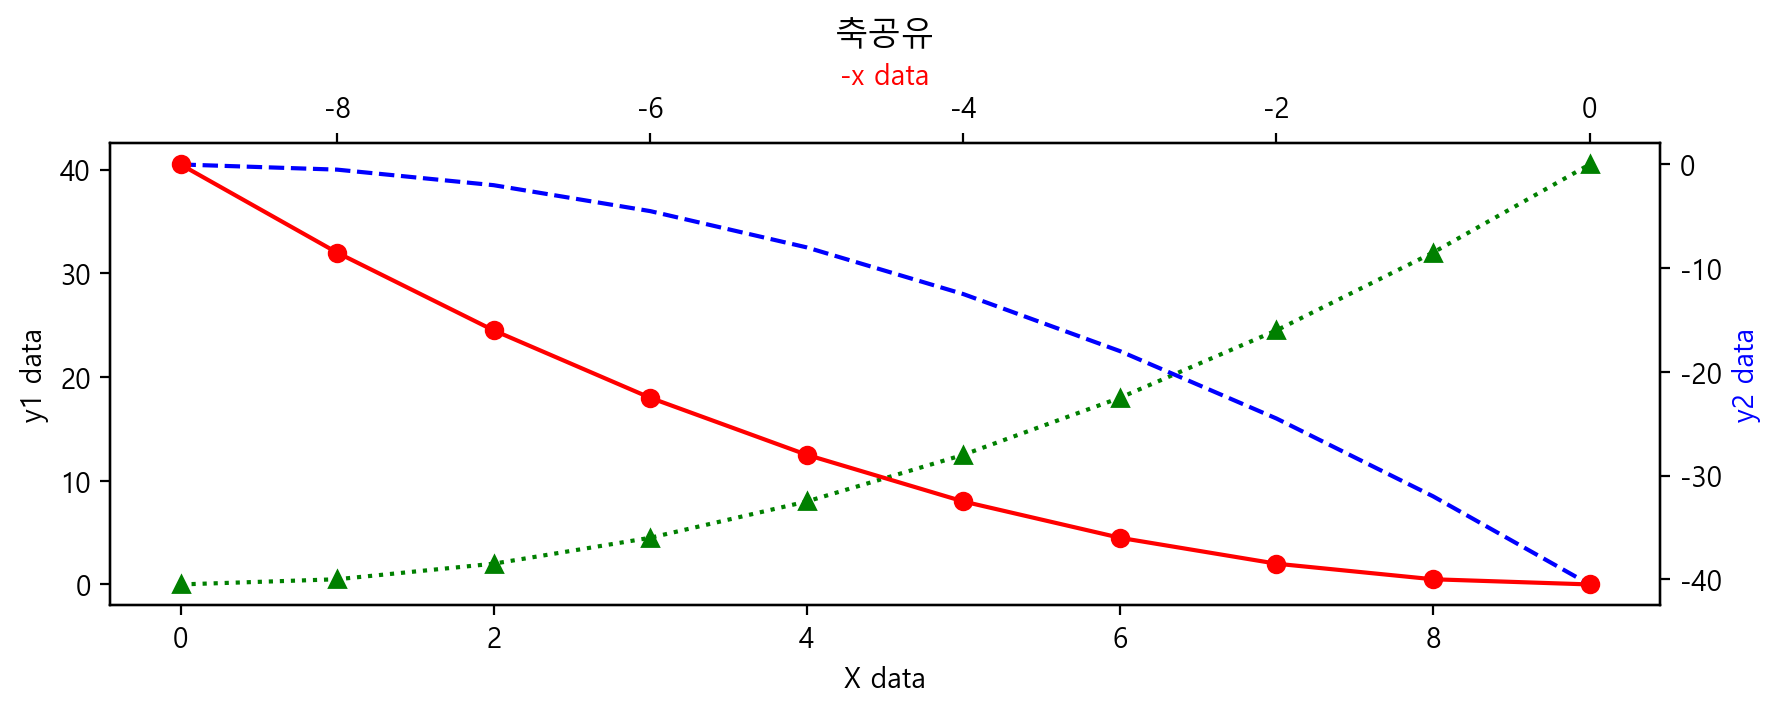

In [104]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax1.plot(x, y1, 'g^:')
ax1.set(title='축공유', xlabel='X data', ylabel='y1 data')

ax2 = ax1.twinx() # ax1과 x축을 공유하는 ax2
ax2.plot(x, y2, 'b--')
ax2.set_ylabel('y2 data', color='b')

ax3 = ax1.twiny() # ax1과 y축을 공유하는 ax3
ax3.plot(-x, y1, 'ro-')
ax3.set_xlabel('-x data', color='r')
plt.show()

### 6) 범례 표시
-https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용

### 7) 플롯 스타일 지정 
- 플롯 스타일 지정시 플롯의 기존 설정값이 초기화
    * plt.rc('font', family='Malgun Gothic') # 윈도우즈
    * plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

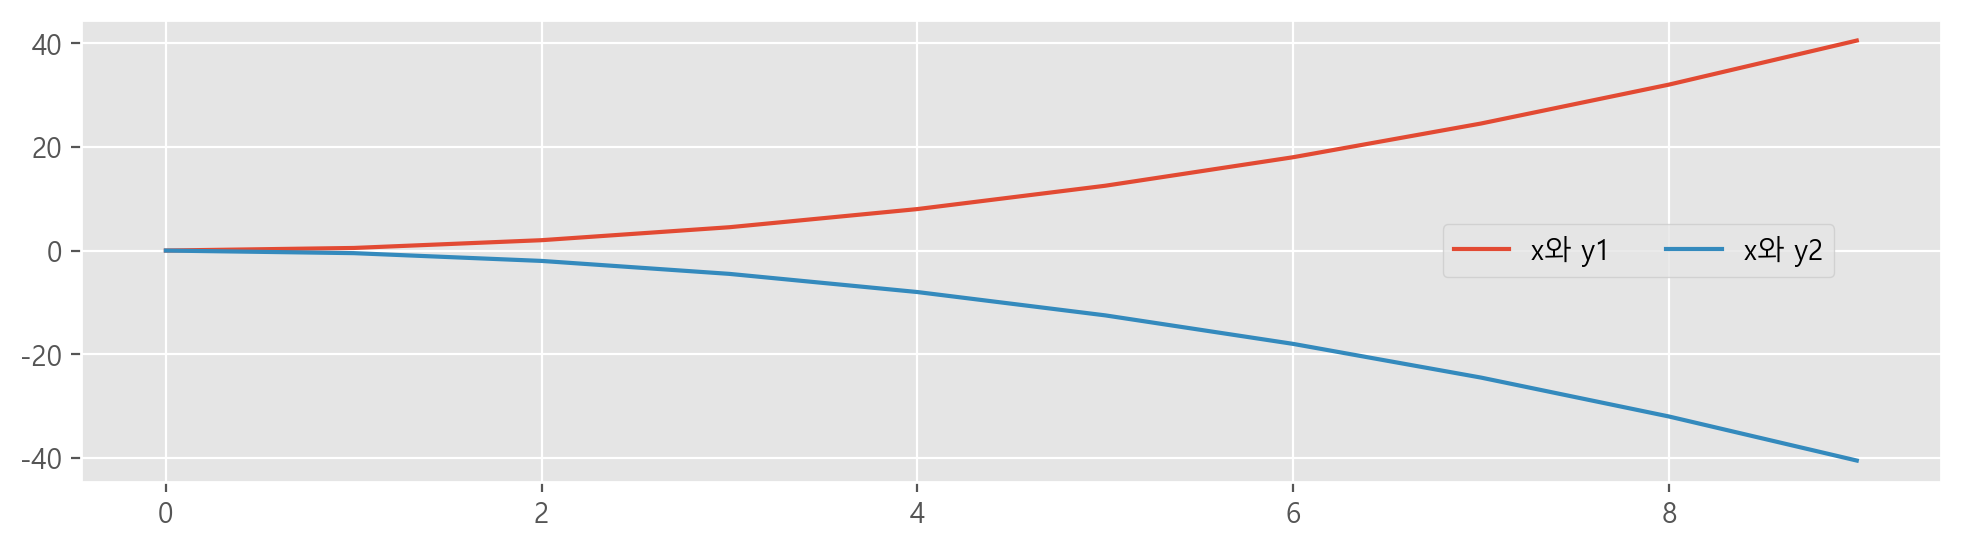

In [121]:
fig, ax = plt.subplots(figsize=(12,3))
plt.style.use('ggplot') # default, ggplot, seaborn, classic
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
ax.plot(x, y1, label='x와 y1')
ax.plot(x, y2, label='x와 y2')
plt.legend(loc='center right', ncol=2, bbox_to_anchor=(0.95, 0.5))
plt.show()

color : https://matplotlib.org/stable/users/explain/colors/colormaps.html
pieChart : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

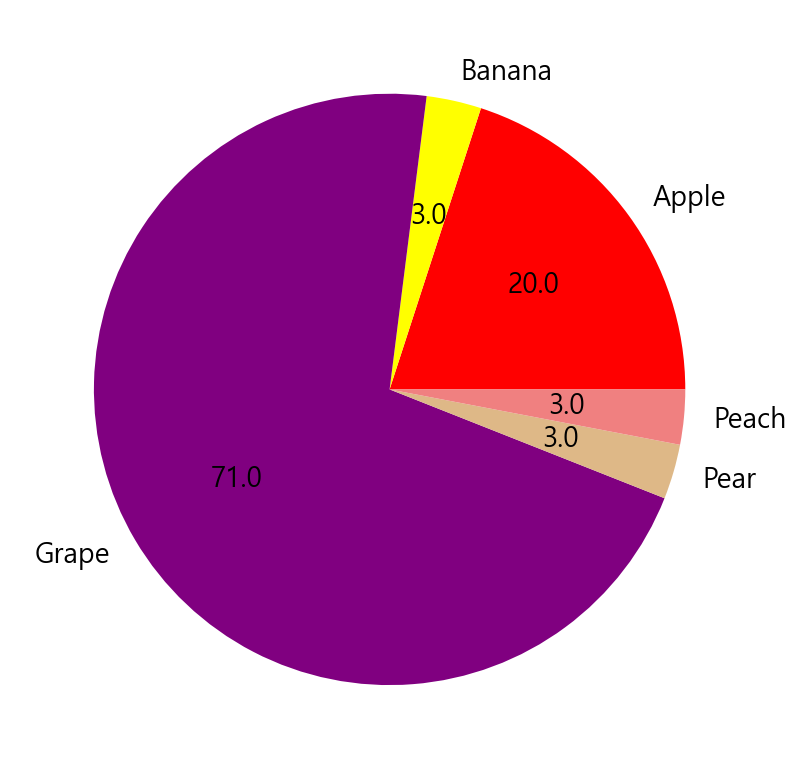

In [18]:
import numpy as np
colors=['red','yellow','purple','burlywood', 'lightcoral'] # 색상
labels = ['Apple','Banana','Grape', 'Pear','Peach'] # 라벨
frequency = [20,3,71,3,3] # 빈도
plt.pie(frequency, labels=labels, colors=colors, autopct='%.1f')
plt.show()